In [128]:
# Importing libraries
import subprocess
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import time

In [129]:
# Function to run the executable
def run_cpp_code(num_threads, num_points): # arguements: number of threads, number of points
    
    # command to run the C++ executable
    command = f'"C:\\Users\\νο ναμε\\OpenMp\\monte_carlo_pi_2.exe" {num_threads} {num_points}'


    # Starting the timer
    start_time = time.time()
    
    # Checking for errors in execution
    try:
        # Running the command 
        output = subprocess.check_output(command, shell=True, stderr=subprocess.STDOUT, universal_newlines=True)
    except subprocess.CalledProcessError as e:
        # Printing the error for debugging
        print(f"Command failed with exit status {e.returncode}")
        print(f"Error output:\n{e.output}")
        return None
    
    # Calculating the execution time
    execution_time = time.time() - start_time
    
    # Printing current execution information: threads and points used
    print(f"Running with {num_threads} threads and {num_points} points.")
    
    # Printing the output: pi estimation of current execution
    print(f"Pi estimate from C++ code:\n{output.strip()}")

    return execution_time 


In [130]:
# Defining parameters for the executions
num_points = 100000000 # number of points to be used in all executions
num_threads_list = [1, 2, 4, 6, 8, 10, 12]  # list of numbers of threads the C++ code will be executed with
execution_times = [] # list to store execution times

In [131]:
# Running the C++ code with different numbers of threads
for num_threads in num_threads_list:
    exec_time = run_cpp_code(num_threads, num_points) # calling function that runs the executable
    execution_times.append(exec_time) # appending time of current execution to list

Running with 1 threads and 100000000 points.
Pi estimate from C++ code:
3.1416
Running with 2 threads and 100000000 points.
Pi estimate from C++ code:
3.1416
Running with 4 threads and 100000000 points.
Pi estimate from C++ code:
3.1417
Running with 6 threads and 100000000 points.
Pi estimate from C++ code:
3.14134
Running with 8 threads and 100000000 points.
Pi estimate from C++ code:
3.14159
Running with 10 threads and 100000000 points.
Pi estimate from C++ code:
3.1415
Running with 12 threads and 100000000 points.
Pi estimate from C++ code:
3.14176


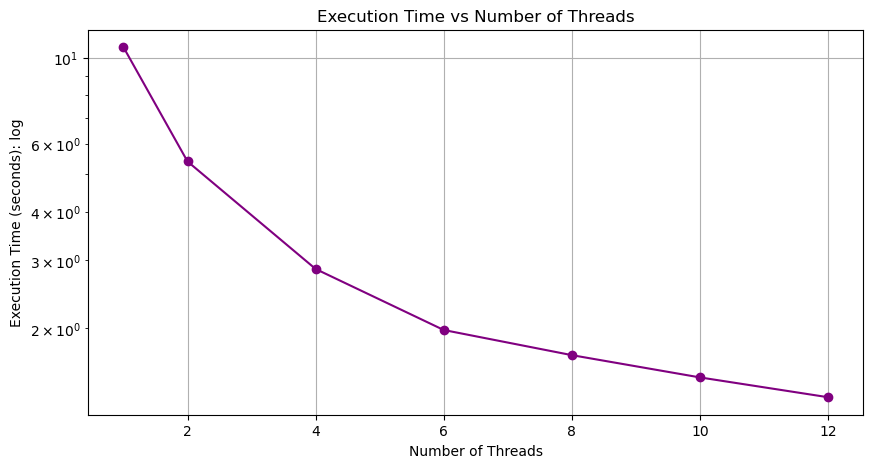

In [132]:
execution_times = np.array(execution_times)

# Plotting Execution time vs Number of Threads
plt.figure(figsize=(10, 5))
plt.plot(num_threads_list, execution_times, marker='o', color="purple")
plt.title('Execution Time vs Number of Threads')
plt.xlabel('Number of Threads')
plt.ylabel('Execution Time (seconds): log')
plt.xscale('linear')
plt.yscale('log')  # log scale for y-axis
plt.grid()
plt.show()

In [133]:
# Calculating speedup
speedup = execution_times[0] / execution_times

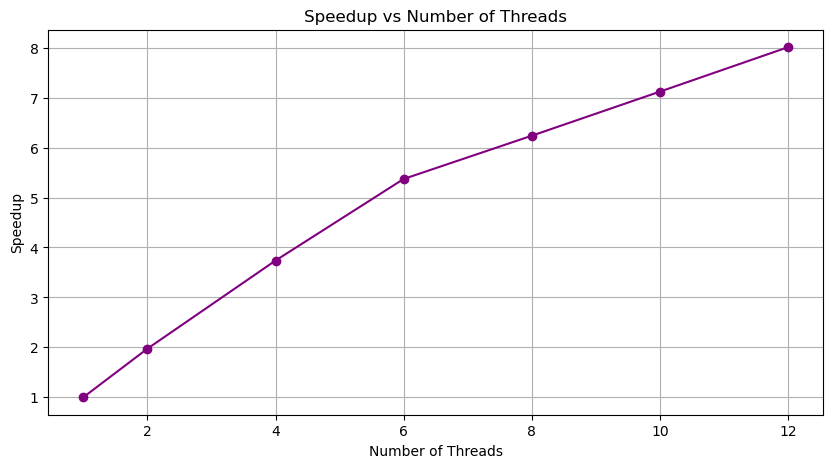

In [134]:
# Plotting Speedup vs Number of Threads
plt.figure(figsize=(10, 5))
plt.plot(num_threads_list, speedup, marker='o', color="purple")
plt.title('Speedup vs Number of Threads')
plt.xlabel('Number of Threads')
plt.ylabel('Speedup')
plt.xscale('linear')
plt.yscale('linear')  
plt.grid()
plt.show()

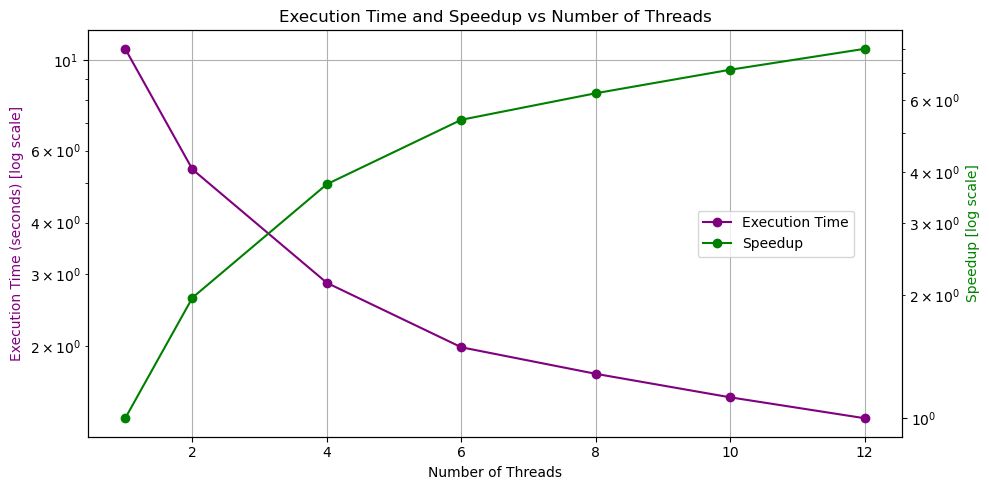

In [135]:
# Displaying both in the same graph
fig, ax1 = plt.subplots(figsize=(10, 5))

# Execution Time vs Number of Threads 
line1 = ax1.plot(num_threads_list, execution_times, marker='o', color="purple", label='Execution Time')
ax1.set_xlabel('Number of Threads')
ax1.set_ylabel('Execution Time (seconds) [log scale]', color="purple")
ax1.set_xscale('linear')
ax1.set_yscale('log') 
ax1.grid()

# Speedup vs Number of Threads
ax2 = ax1.twinx()
line2 = ax2.plot(num_threads_list, speedup, marker='o', color="green", label='Speedup')
ax2.set_ylabel('Speedup [log scale]', color="green")
ax2.set_xscale('linear')
ax2.set_yscale('log') 


plt.title('Execution Time and Speedup vs Number of Threads')

# Legend
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='center right', bbox_to_anchor=(0.95, 0.5))  


plt.tight_layout()


plt.show()


In [136]:
# Amdahl's Law function
def amdahls_law(x, p):
    return 1 / (1 - p + p / x)

# Initial guess for the proportion of parallelizable code
p_guess = 0.9  

# Curve fitting to find the optimal value of p
p_opt, _ = curve_fit(amdahls_law, num_threads_list, speedup, p0=p_guess)

# Printing results
print(f'Estimated proportion of parallelizable code (p): {p_opt[0]}')
print(f'Maximum speedup in the limit of 10000 threads: {amdahls_law(10000, p_opt[0])}')


Estimated proportion of parallelizable code (p): 0.9571884717082322
Maximum speedup in the limit of 10000 threads: 23.306086190099403


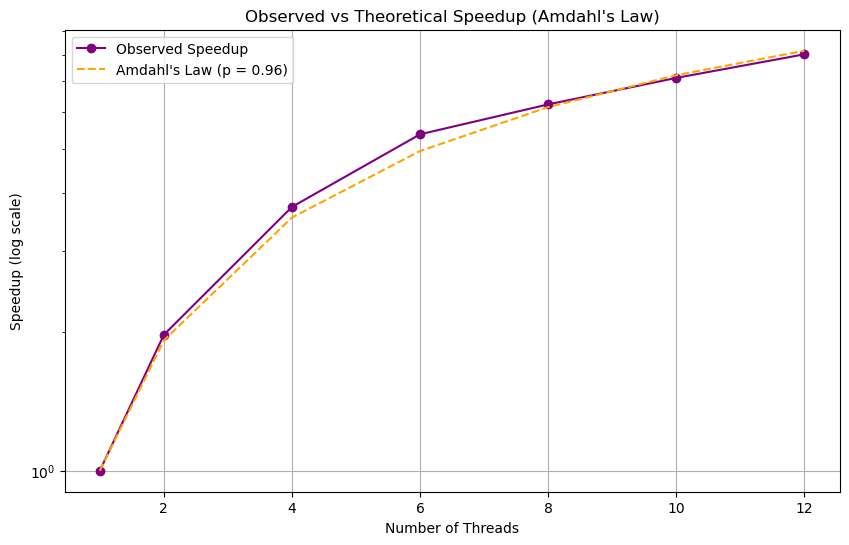

In [137]:
# Generating theoretical speedup based on the fitted p value
speedup_theoretical = amdahls_law(num_threads_list, p_opt[0])

# Plotting the observed and theoretical speedup
plt.figure(figsize=(10, 6))
plt.plot(num_threads_list, speedup, 'o-', label='Observed Speedup', color='purple')
plt.plot(num_threads_list, speedup_theoretical, '--', label=f'Amdahl\'s Law (p = {p_opt[0]:.2f})', color='orange')

plt.yscale('log')
plt.title('Observed vs Theoretical Speedup (Amdahl\'s Law)')
plt.xlabel('Number of Threads')
plt.ylabel('Speedup (log scale)')
plt.grid(True)
plt.legend(loc='best')

plt.show()


In [138]:
# Amdahl's Law fitting for up to 6 threads

p_guess2 = 0.9  # Initial guess for p
p_opt2, _ = curve_fit(amdahls_law, num_threads_list[0:4], speedup[0:4], p0=p_guess2)

print(f'Estimated proportion of parallelizable code (p): {p_opt2[0]}')
print(f'Maximum speedup in the limit of 10000 threads: {amdahls_law(10000, p_opt2[0])}')

Estimated proportion of parallelizable code (p): 0.9766871795941889
Maximum speedup in the limit of 10000 threads: 42.7158952003537
